In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vgsales_df = pd.read_csv('C:/Users/hp/Documents/Global Video Games Sales/vgsales.csv')
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
vgsales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
vgsales_df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

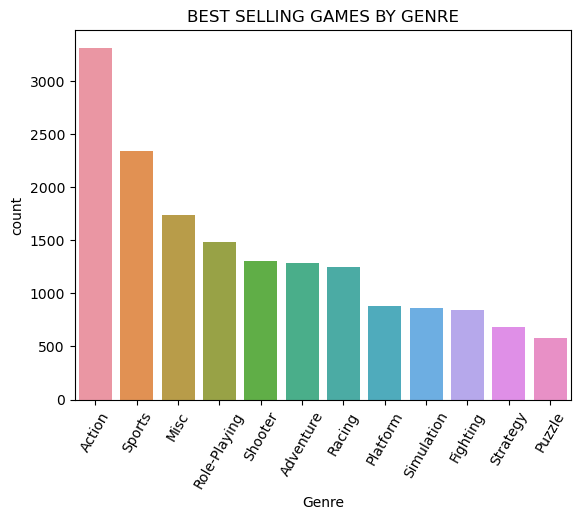

In [17]:
# Plot a countplot of the best selling games by genre
sns.countplot(data=vgsales_df, x = 'Genre', order = vgsales_df['Genre'].value_counts().index)
plt.title('BEST SELLING GAMES BY GENRE')
plt.xticks(rotation=60)
plt.show()

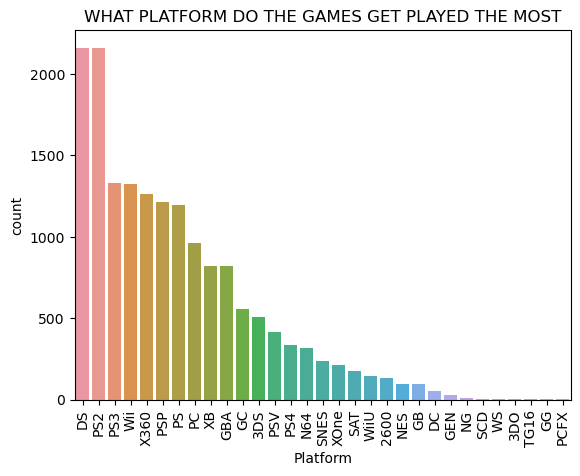

In [20]:
# Plot a countplot of the most played platform
sns.countplot(data=vgsales_df, x = 'Platform', order = vgsales_df['Platform'].value_counts().index)
plt.title('WHAT PLATFORM DO THE GAMES GET PLAYED THE MOST')
plt.xticks(rotation=90)
plt.show()

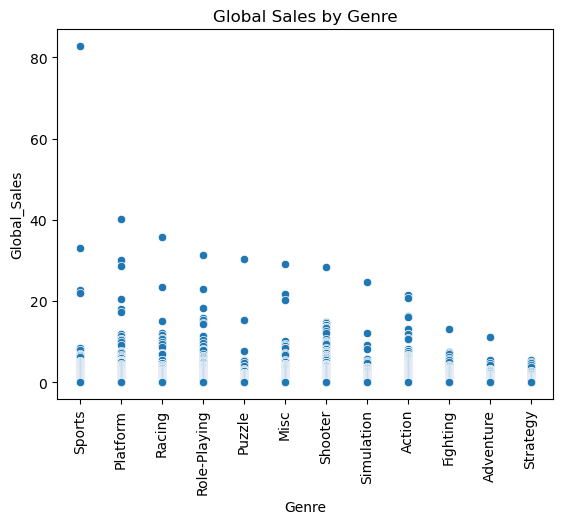

In [10]:
# Plot a scatterplot of the global sales by genre
sns.scatterplot(x="Genre", y="Global_Sales", data=vgsales_df)
plt.title("Global Sales by Genre")
plt.xticks(rotation=90)
plt.show()

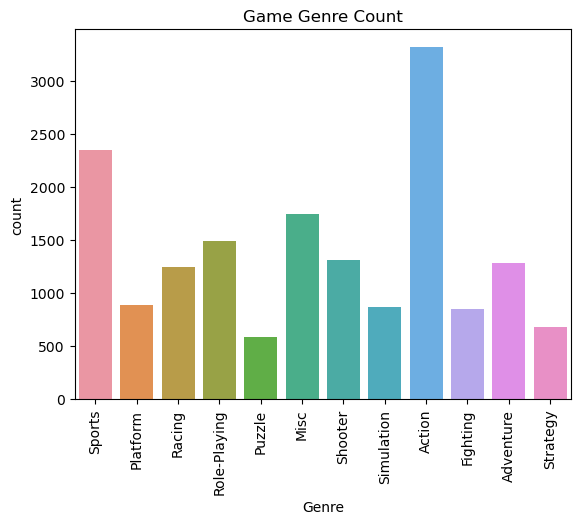

In [12]:
# Plot a countplot of the game genres
sns.countplot(x="Genre", data=vgsales_df)
plt.title("Game Genre Count")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Aggregate and sort the data based on the sales in each region or globally
# NA_Sales
t_v_name_NA = vgsales_df.groupby('Name').agg({'NA_Sales': 'sum'}).reset_index()
t_v_name_NA = t_v_name_NA.sort_values(by='NA_Sales', ascending=False)

# EU_Sales
t_v_name_EU = vgsales_df.groupby('Name').agg({'EU_Sales': 'sum'}).reset_index()
t_v_name_EU = t_v_name_EU.sort_values(by='EU_Sales', ascending=False)

# JP_Sales
t_v_name_JP = vgsales_df.groupby('Name').agg({'JP_Sales': 'sum'}).reset_index()
t_v_name_JP = t_v_name_JP.sort_values(by='JP_Sales', ascending=False)

# Other_Sales
t_v_name_Other = vgsales_df.groupby('Name').agg({'Other_Sales': 'sum'}).reset_index()
t_v_name_Other = t_v_name_Other.sort_values(by='Other_Sales', ascending=False)

# Global_Sales
t_v_name_Global = vgsales_df.groupby('Name').agg({'Global_Sales': 'sum'}).reset_index()
t_v_name_Global = t_v_name_Global.sort_values(by='Global_Sales', ascending=False)

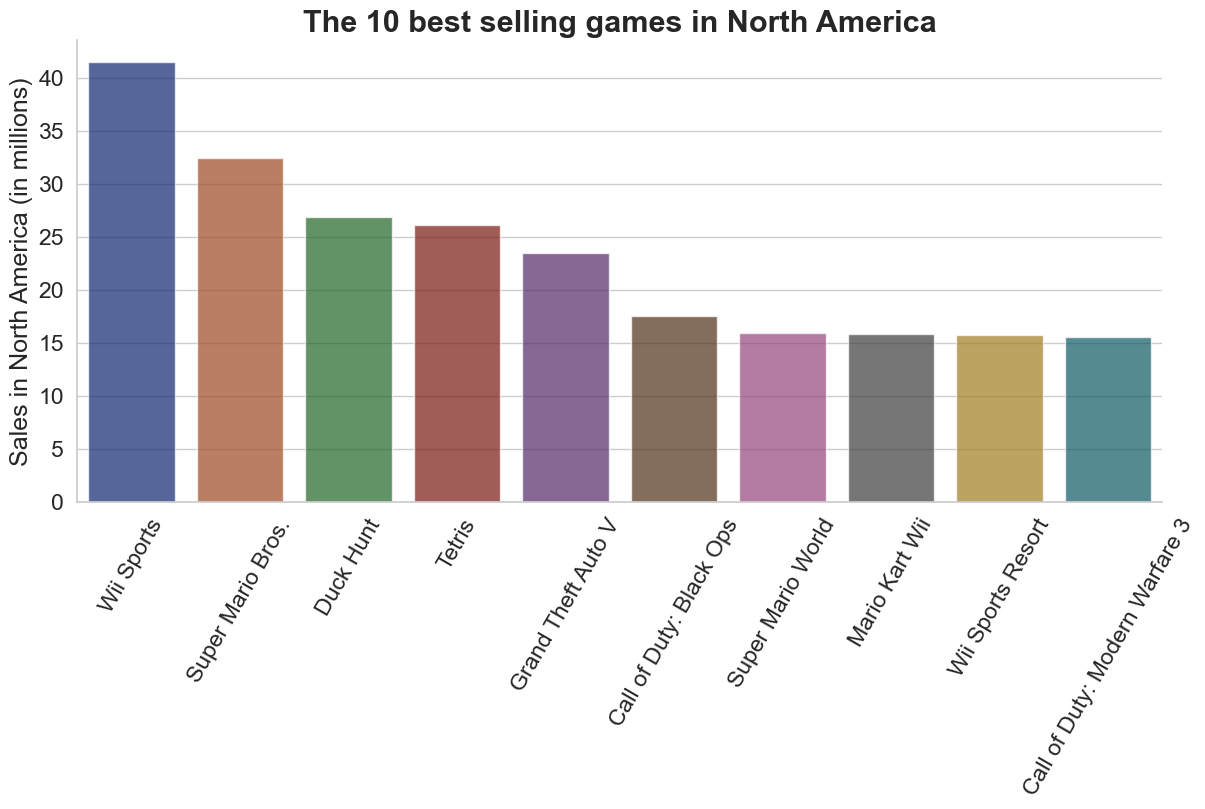

In [29]:
# Plotting the 10 best selling games in North America
plt.figure(figsize=(14, 6))
sns.barplot(x="Name", y="NA_Sales", data=t_v_name_NA.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in North America (in millions)")
plt.title("The 10 best selling games in North America", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()

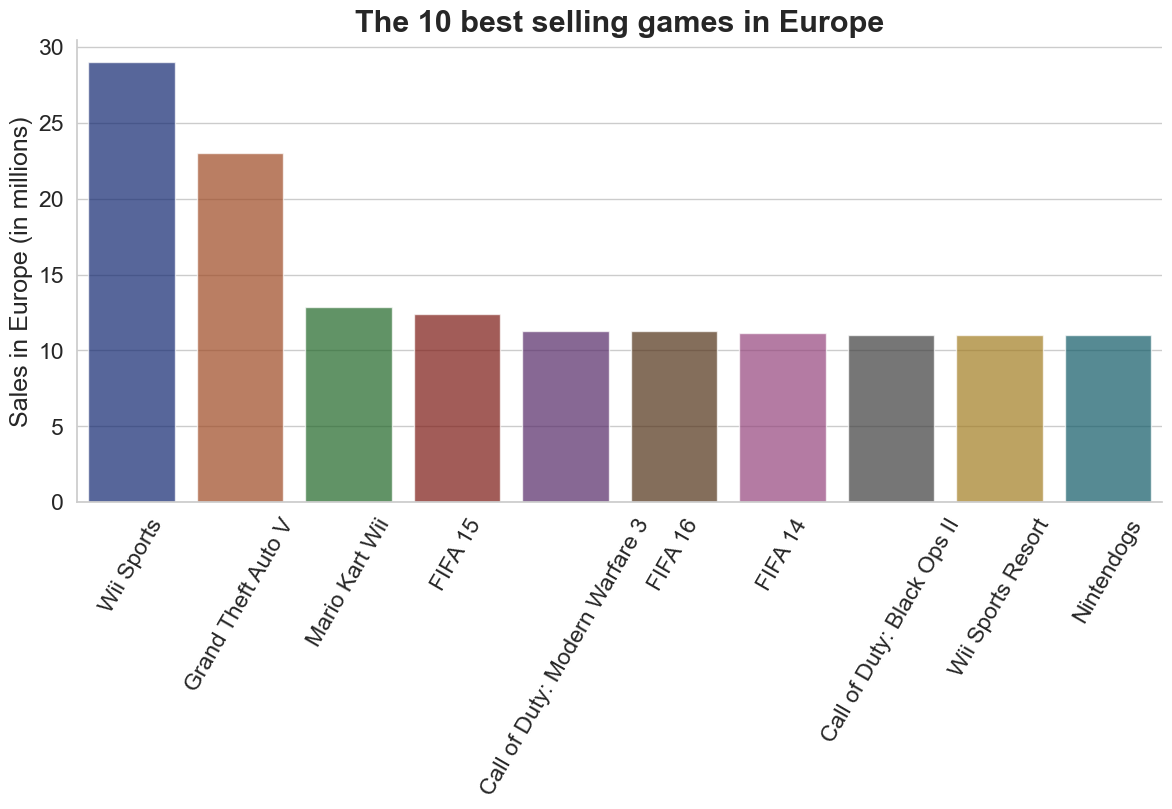

In [30]:
# Plotting the 10 best selling games in Europe
plt.figure(figsize=(14, 6))
sns.barplot(x="Name", y="EU_Sales", data=t_v_name_EU.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in Europe (in millions)")
plt.title("The 10 best selling games in Europe", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()

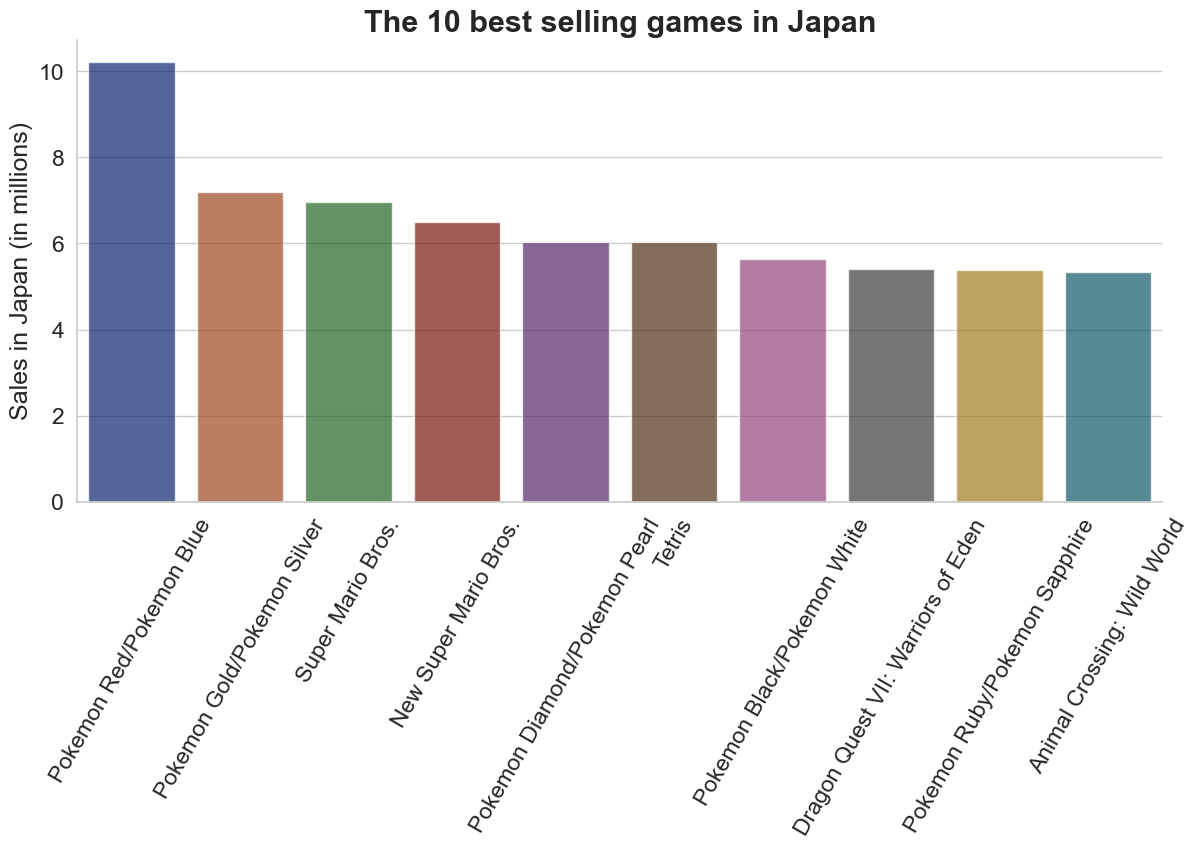

In [32]:
# Plotting the 10 best selling games in Japan
plt.figure(figsize=(14, 6))
sns.barplot(x="Name", y="JP_Sales", data=t_v_name_JP.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in Japan (in millions)")
plt.title("The 10 best selling games in Japan", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()

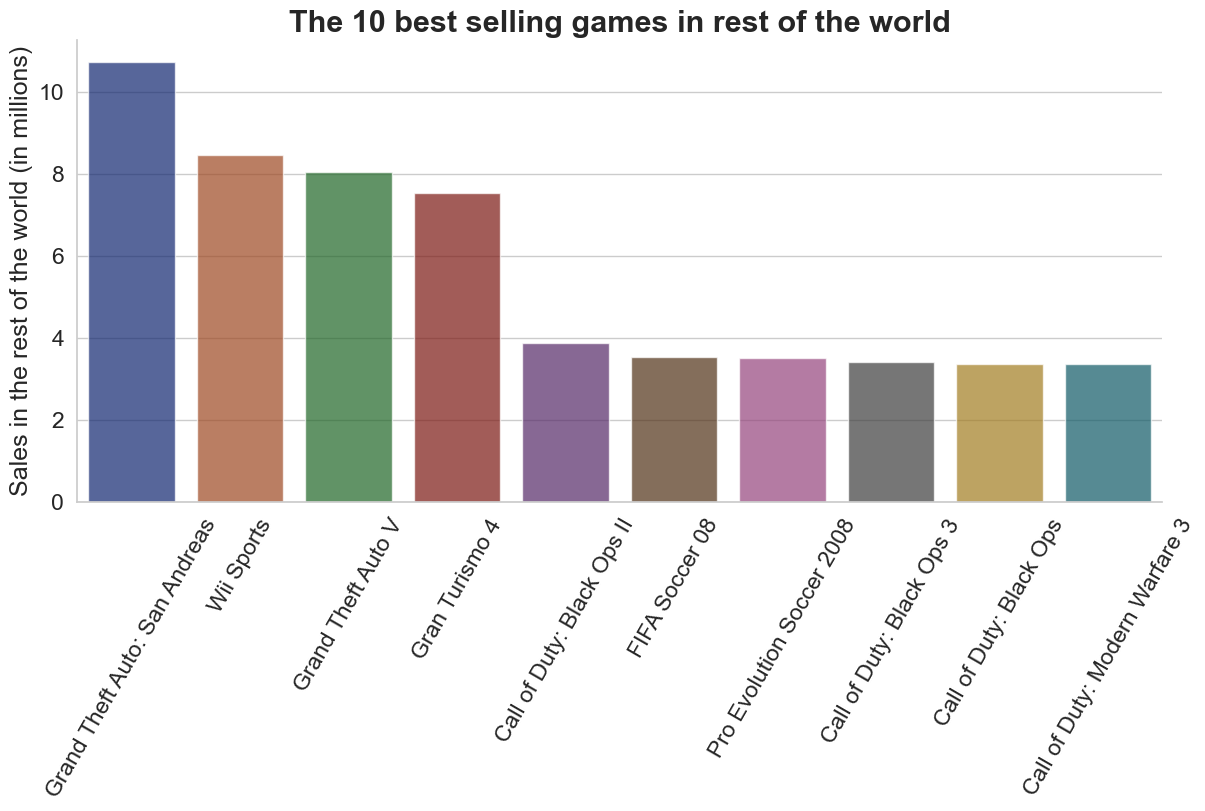

In [33]:
# Plotting the 10 best selling games in the rest of the world
plt.figure(figsize=(14, 6))
sns.barplot(x="Name", y="Other_Sales", data=t_v_name_Other.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in the rest of the world (in millions)")
plt.title("The 10 best selling games in rest of the world", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()

In [49]:
# Aggregate and sort the data based on platforms with the highest number of game sales globally
p_name_Global = vgsales_df.groupby('Platform')['Global_Sales'].sum().reset_index()
p_name_Global = p_name_Global.sort_values(by='Global_Sales', ascending=False)

p_name_Global = pd.DataFrame(p_name_Global)
p_name_Global.index = range(1, len(p_name_Global)+1)
p_name_Global.head(10)



,Platform,Global_Sales
1,PS2,1255.64
2,X360,979.96
3,PS3,957.84
4,Wii,926.71
5,DS,822.49
6,PS,730.66
7,GBA,318.50
8,PSP,296.28
9,PS4,278.10
10,PC,258.82


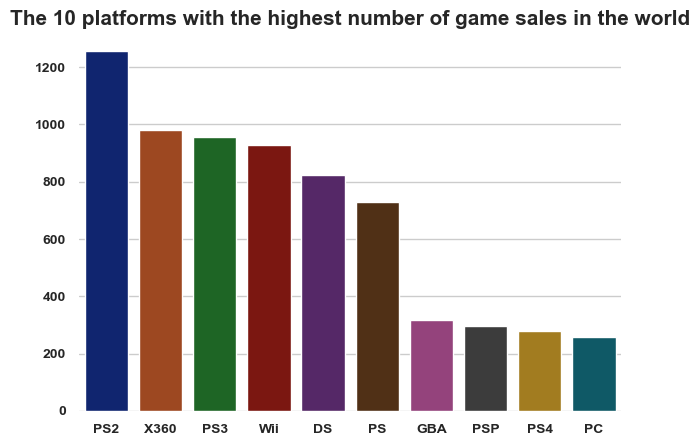

In [50]:
# Plotting the 10 platforms with the highest number of game sales in the world
sns.set_style("whitegrid")

sns.barplot(x="Platform", y="Global_Sales", data=p_name_Global.head(10), palette="dark")

plt.xlabel("")
plt.ylabel("")
plt.title("The 10 platforms with the highest number of game sales in the world", fontsize=15, fontweight="bold")

plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [52]:
# Aggregate and sort the data based on genres with the highest number of game sales globally
g_name_Global = vgsales_df.groupby('Genre')['Global_Sales'].sum().reset_index()
g_name_Global = g_name_Global.sort_values(by='Global_Sales', ascending=False)

g_name_Global = pd.DataFrame(g_name_Global)
g_name_Global.index = range(1, len(g_name_Global)+1)
g_name_Global.head(10)


,Genre,Global_Sales
1,Action,1751.18
2,Sports,1330.93
3,Shooter,1037.37
4,Role-Playing,927.37
5,Platform,831.37
6,Misc,809.96
7,Racing,732.04
8,Fighting,448.91
9,Simulation,392.20
10,Puzzle,244.95


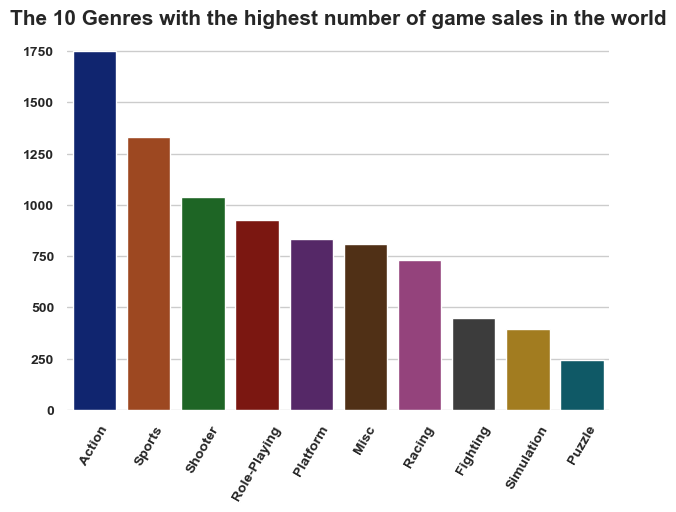

In [55]:
# Plotting the 10 platforms with the highest number of game sales in the world
sns.set_style("whitegrid")

sns.barplot(x="Genre", y="Global_Sales", data=g_name_Global.head(10), palette="dark")

plt.xlabel("")
plt.ylabel("")
plt.title("The 10 Genres with the highest number of game sales in the world", fontsize=15, fontweight="bold")

plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

In [59]:
# Aggregate and sort the data based on the publisher sales in each region or globally
# NA_Sales
publ_NA = vgsales_df.groupby('Publisher').agg({'NA_Sales': 'sum'}).reset_index()
publ_NA = publ_NA.sort_values(by='NA_Sales', ascending=False)

# EU_Sales
publ_EU = vgsales_df.groupby('Publisher').agg({'EU_Sales': 'sum'}).reset_index()
publ_EU = publ_EU.sort_values(by='EU_Sales', ascending=False)

# JP_Sales
publ_JP = vgsales_df.groupby('Publisher').agg({'JP_Sales': 'sum'}).reset_index()
publ_JP = publ_JP.sort_values(by='JP_Sales', ascending=False)

# Other_Sales
publ_Other = vgsales_df.groupby('Publisher').agg({'Other_Sales': 'sum'}).reset_index()
publ_Other = publ_Other.sort_values(by='Other_Sales', ascending=False)

# Global_Sales
publ_Global = vgsales_df.groupby('Publisher').agg({'Global_Sales': 'sum'}).reset_index()
publ_Global = publ_Global.sort_values(by='Global_Sales', ascending=False)

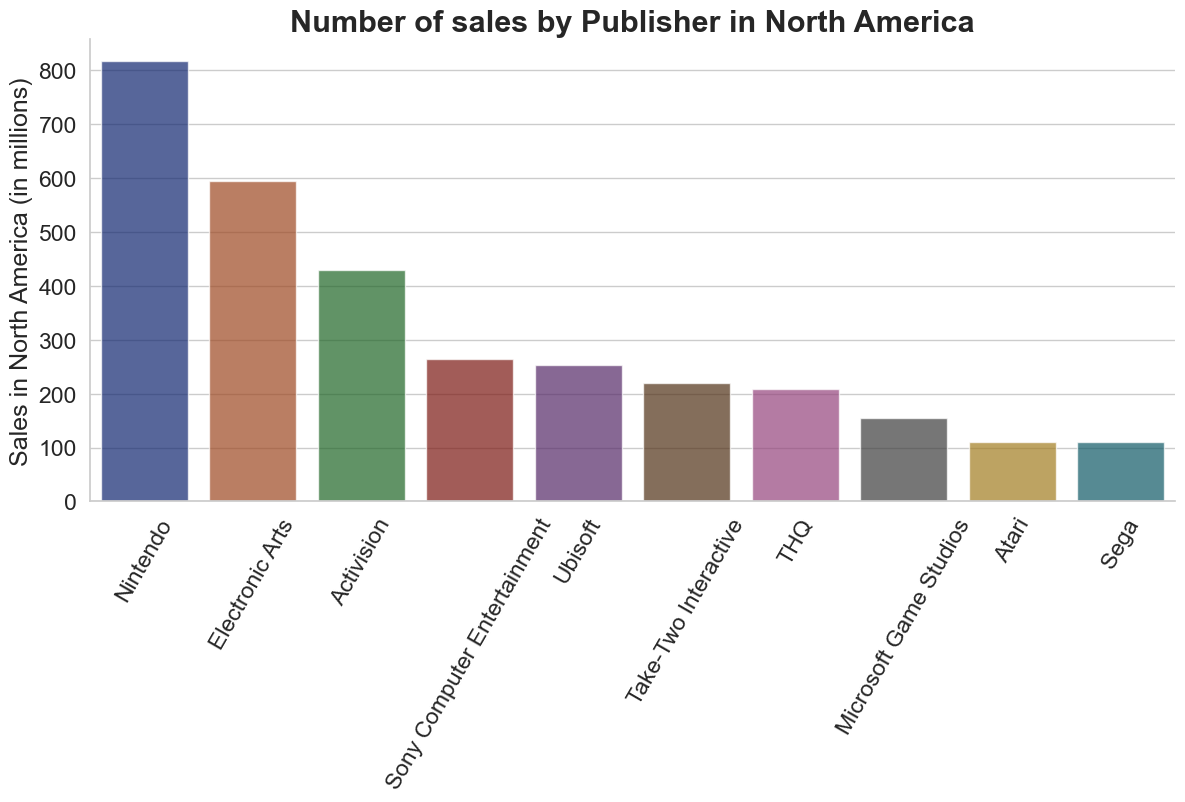

In [63]:
# Plotting the 10 publishers in North America
plt.figure(figsize=(14, 6))
sns.barplot(x="Publisher", y="NA_Sales", data=publ_NA.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in North America (in millions)")
plt.title("Number of sales by Publisher in North America", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()


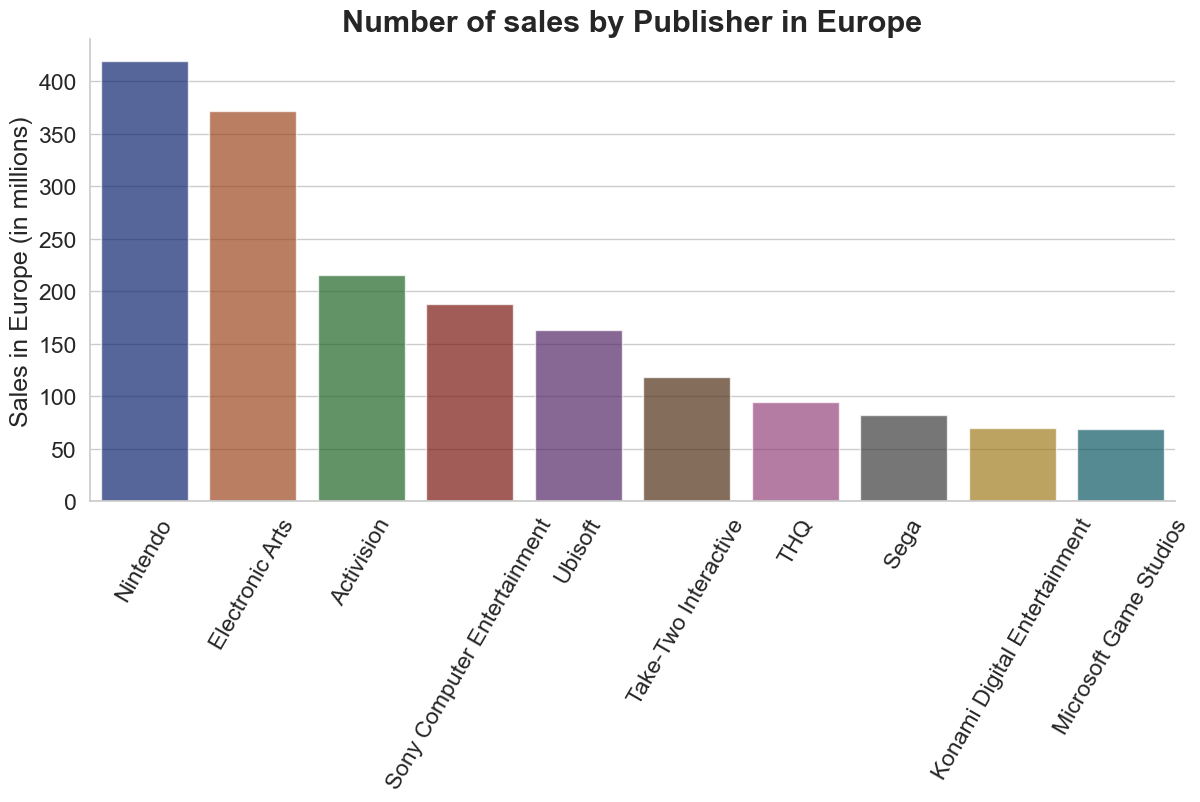

In [64]:
# Plotting the 10 publishers in Europe
plt.figure(figsize=(14, 6))
sns.barplot(x="Publisher", y="EU_Sales", data=publ_EU.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in Europe (in millions)")
plt.title("Number of sales by Publisher in Europe", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()


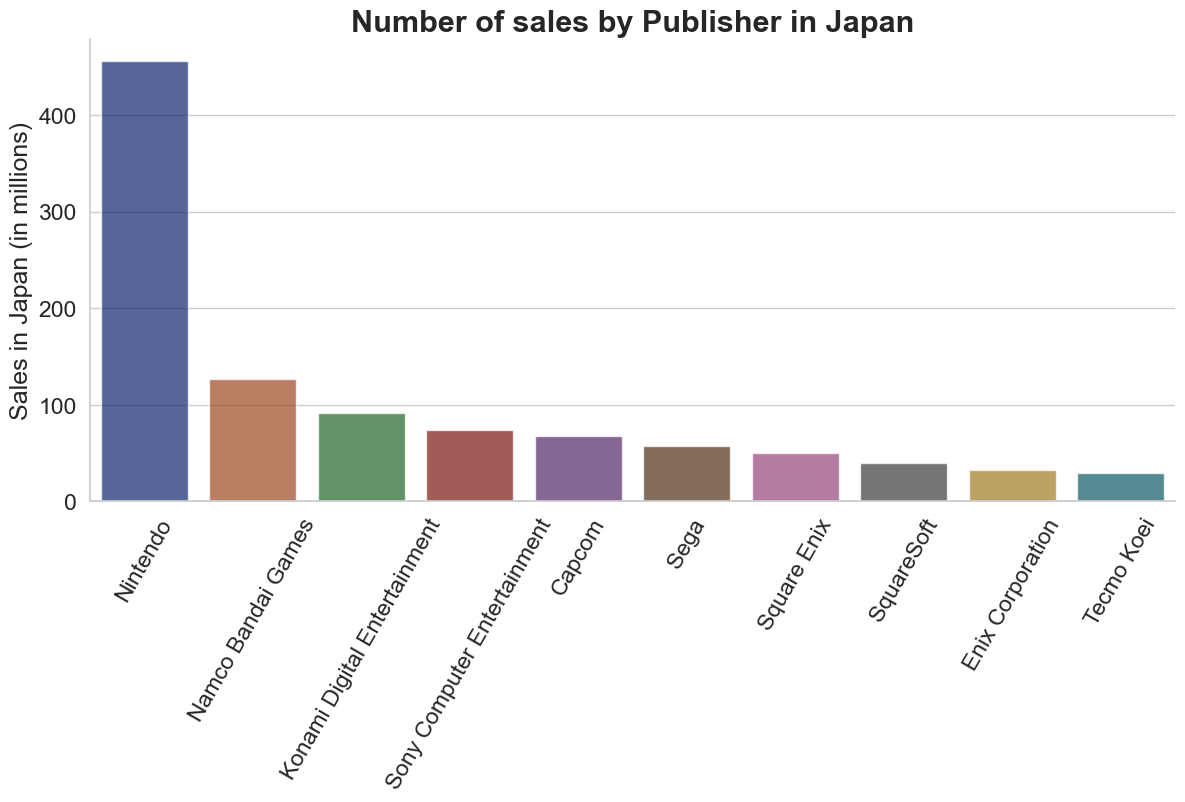

In [65]:
# Plotting the 10 publishers in Japan
plt.figure(figsize=(14, 6))
sns.barplot(x="Publisher", y="JP_Sales", data=publ_JP.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in Japan (in millions)")
plt.title("Number of sales by Publisher in Japan", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()


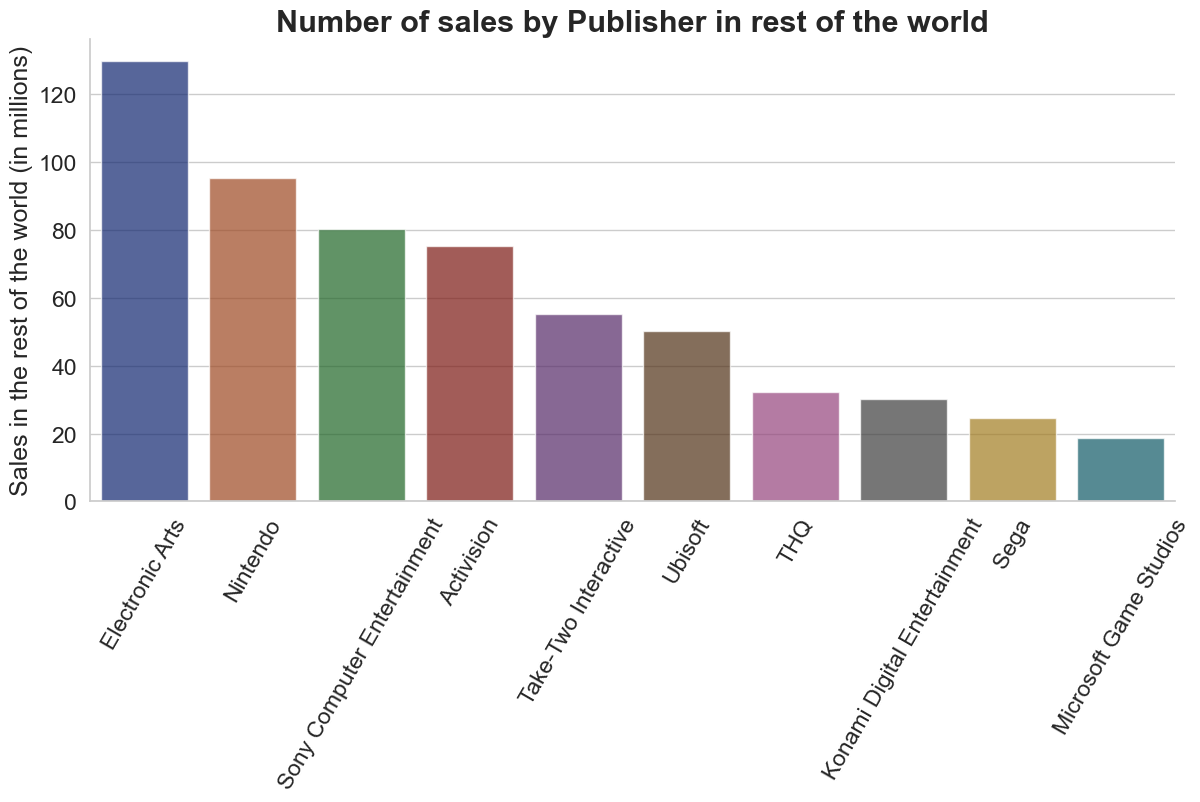

In [66]:
# Plotting the 10 publishers in the rest of the world
plt.figure(figsize=(14, 6))
sns.barplot(x="Publisher", y="Other_Sales", data=publ_Other.head(10), palette="dark",
            alpha=0.7)
plt.xlabel("")
plt.ylabel("Sales in the rest of the world (in millions)")
plt.title("Number of sales by Publisher in rest of the world", fontsize=22, fontweight="bold")
plt.xticks(rotation=60)
sns.despine()

plt.show()

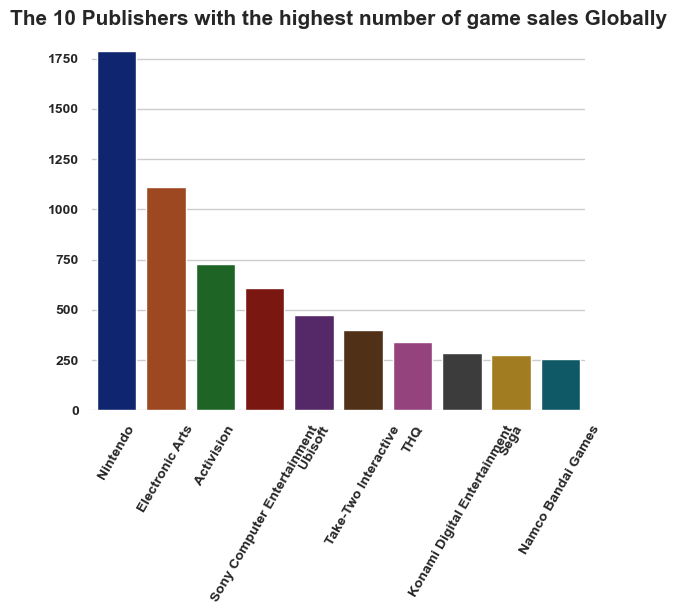

In [69]:
# Plotting the 10 publishers with the highest number of game sales in the world
sns.set_style("whitegrid")

sns.barplot(x="Publisher", y="Global_Sales", data=publ_Global.head(10), palette="dark")

plt.xlabel("")
plt.ylabel("")
plt.title("The 10 Publishers with the highest number of game sales Globally", fontsize=15, fontweight="bold")

plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()